# Machine Learning Models

In [195]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from pandas_profiling import ProfileReport

In [196]:
## classification ml:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

In [197]:
## regression ml
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree.export import export_text
from sklearn.neighbors import KNeighborsRegressor

In [198]:
### evaluation
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [199]:
### optimize model
from sklearn.feature_selection import RFE
from sklearn.decomposition import PCA, FastICA

In [200]:
ds = pd.read_csv('./data/datamax_cleaned.csv', index_col=0)

In [201]:
#subsets
background = ['PB140: YEAR OF BIRTH','PB150: SEX','PB190: MARITAL STATUS','PB200: CONSENSUAL UNION', 'PB220A: CITIZENSHIP']

education = ['PE010: CURRENT EDUCATION ACTIVITY', 'PE040: HIGHEST ISCED LEVEL ATTAINED']

work = ['PL031: SELF-DEFINED CURRENT ECONOMIC STATUS', 'PL035: WORKED AT LEAST 1 HOUR DURING THE PREVIOUS WEEK', 'PL051: OCCUPATION (ISCO-08 (COM))', 'PL150: MANAGERIAL POSITION']

health = ['PH010: GENERAL HEALTH',
 'PH020: SUFFER FROM ANY A CHRONIC (LONG-STANDING) ILLNESS OR CONDITION',
 'PH030: LIMITATION IN ACTIVITIES BECAUSE OF HEALTH PROBLEMS',
 'PH040: UNMET NEED FOR MEDICAL EXAMINATION OR TREATMENT',
 'PH060: UNMET NEED FOR DENTAL EXAMINATION OR TREATMENT']

job= ['PY010G_PY020G_PY021G_PY050G: EMPLOYEE INCOME',
       'PY035G: CONTRIBUTIONS TO INDIVIDUAL PRIVATE PENSION PLANS',
      'PY080G: PENSION FROM INDIVIDUAL PRIVATE PLANS',
      "PY090G++: SOCIAL BENEFITS"]
jobdiff=['PY010G_PY020G_PY021G_PY050G: EMPLOYEE INCOME',
       'PY035G: CONTRIBUTIONS TO INDIVIDUAL PRIVATE PENSION PLANS',
      'PY080G: PENSION FROM INDIVIDUAL PRIVATE PLANS',
       'PY090G: UNEMPLOYMENT BENEFITS', 'PY100G: OLD-AGE BENEFITS',
       'PY110G: SURVIVOR’ BENEFITS', 'PY120G: SICKNESS BENEFITS',
       'PY130G: DISABILITY BENEFITS', 'PY140G: EDUCATION-RELATED ALLOWANCES']


bneeds= ['PD020: Replace worn-out clothes by some new (not second-hand) ones',
       'PD030: Two pairs of properly fitting shoes',
       'PD050: Get-together with friends/family (relatives) for a drink/meal at least once a month',
       'PD060: Regularly participate in a leisure activity',
       'PD070: Spend a small amount of money each week on yourself',
       'PD080: Internet connection for personal use at home']


sat =['PW010: OVERALL LIFE SATISFACTION', 'PW020: MEANING OF LIFE',
       'PW030: SATISFACTION WITH FINANCIAL SITUATION',
       'PW040: SATISFACTION WITH ACCOMMODATION', 'PW050: BEING VERY NERVOUS',
       'PW060: FEELING DOWN IN THE DUMPS', 'PW070: FEELING CALM AND PEACEFUL',
       'PW080: FEELING DOWNHEARTED OR DEPRESSED', 'PW090: BEING HAPPY',
       'PW120: SATISFACTION WITH TIME USE',
       'PW130: TRUST IN THE POLITICAL SYSTEM',
       'PW140: TRUST IN THE LEGAL SYSTEM', 'PW150: TRUST IN THE POLICE',
       'PW160: SATISFACTION WITH PERSONAL RELATIONSHIPS',
       'PW170: PERSONAL MATTERS (ANYONE TO DISCUSS WITH)',
       'PW180: HELP FROM OTHERS', 'PW190: TRUST IN OTHERS',
       'PW200: SATISFACTION WITH RECREATIONAL OR GREEN AREAS',
       'PW210: SATISFACTION WITH LIVING ENVIRONMENT',
       'PW220: PHYSICAL SECURITY']

subsets= [background,education,work,health,job,bneeds, sat]
columns = []
for x in subsets:
    for y in x:
        columns.append (y)
columns

['PB140: YEAR OF BIRTH',
 'PB150: SEX',
 'PB190: MARITAL STATUS',
 'PB200: CONSENSUAL UNION',
 'PB220A: CITIZENSHIP',
 'PE010: CURRENT EDUCATION ACTIVITY',
 'PE040: HIGHEST ISCED LEVEL ATTAINED',
 'PL031: SELF-DEFINED CURRENT ECONOMIC STATUS',
 'PL035: WORKED AT LEAST 1 HOUR DURING THE PREVIOUS WEEK',
 'PL051: OCCUPATION (ISCO-08 (COM))',
 'PL150: MANAGERIAL POSITION',
 'PH010: GENERAL HEALTH',
 'PH020: SUFFER FROM ANY A CHRONIC (LONG-STANDING) ILLNESS OR CONDITION',
 'PH030: LIMITATION IN ACTIVITIES BECAUSE OF HEALTH PROBLEMS',
 'PH040: UNMET NEED FOR MEDICAL EXAMINATION OR TREATMENT',
 'PH060: UNMET NEED FOR DENTAL EXAMINATION OR TREATMENT',
 'PY010G_PY020G_PY021G_PY050G: EMPLOYEE INCOME',
 'PY035G: CONTRIBUTIONS TO INDIVIDUAL PRIVATE PENSION PLANS',
 'PY080G: PENSION FROM INDIVIDUAL PRIVATE PLANS',
 'PY090G++: SOCIAL BENEFITS',
 'PD020: Replace worn-out clothes by some new (not second-hand) ones',
 'PD030: Two pairs of properly fitting shoes',
 'PD050: Get-together with friends/fami

In [202]:
ds.head()

,PB030: PERSONAL ID,PB020: COUNTRY,PB010: YEAR OF THE SURVEY,PB140: YEAR OF BIRTH,PB150: SEX,PB190: MARITAL STATUS,PB200: CONSENSUAL UNION,PB220A: CITIZENSHIP,PE010: CURRENT EDUCATION ACTIVITY,PE040: HIGHEST ISCED LEVEL ATTAINED,...,PW130: TRUST IN THE POLITICAL SYSTEM,PW140: TRUST IN THE LEGAL SYSTEM,PW150: TRUST IN THE POLICE,PW160: SATISFACTION WITH PERSONAL RELATIONSHIPS,PW170: PERSONAL MATTERS (ANYONE TO DISCUSS WITH),PW180: HELP FROM OTHERS,PW190: TRUST IN OTHERS,PW200: SATISFACTION WITH RECREATIONAL OR GREEN AREAS,PW210: SATISFACTION WITH LIVING ENVIRONMENT,PW220: PHYSICAL SECURITY
0,35601,DE,2013,1977,1,2.0,3,0,2,3.0,...,3.0,6.0,10.0,8.0,2.0,1.0,-1.0,7.0,8.0,-1.0
1,44701,DE,2013,1936,1,2.0,1,0,2,2.0,...,7.0,4.0,-1.0,8.0,1.0,1.0,8.0,0.0,6.0,2.0
2,59901,DE,2013,1952,2,2.0,3,0,1,5.0,...,3.0,8.0,9.0,10.0,1.0,1.0,-1.0,10.0,6.0,2.0
3,71101,DE,2013,1938,2,2.0,3,0,2,2.0,...,5.0,7.0,5.0,8.0,1.0,-1.0,6.0,9.0,5.0,3.0
4,79501,DE,2013,1950,2,5.0,3,0,2,3.0,...,0.0,2.0,-1.0,2.0,1.0,-1.0,5.0,2.0,10.0,1.0


# <font color=red>With original data (not cleaned): </font>

In [203]:
### refresh ds
def reload():
    return pd.read_csv("./data/DE_2013p_EUSILC.csv")


    #return pd.read_csv('./data/datamax_cleaned.csv', index_col=0)

In [204]:
data= reload()
data=data.dropna(thresh=len(data)*0.8, axis=1)

data.head()

,PB010,PB020,PB030,PB040,PB100,PB110,PB120,PB140,PB150,PB190,...,PW130,PW140,PW150,PW160,PW170,PW180,PW190,PW200,PW210,PW220
0,2013,DE,35601,3057.583187,2,2013,45,1977,1,2.0,...,3.0,6.0,10.0,8.0,2.0,1.0,NaN,7.0,8.0,NaN
1,2013,DE,44701,3057.583187,3,2013,15,1936,1,2.0,...,7.0,4.0,99.0,8.0,1.0,1.0,8.0,0.0,6.0,2.0
2,2013,DE,59901,3057.583187,2,2013,45,1952,2,2.0,...,3.0,8.0,9.0,10.0,1.0,1.0,NaN,10.0,6.0,2.0
3,2013,DE,71101,3057.583187,2,2013,15,1938,2,2.0,...,5.0,7.0,5.0,8.0,1.0,NaN,6.0,9.0,5.0,3.0
4,2013,DE,79501,3057.583187,2,2013,25,1950,2,5.0,...,0.0,2.0,NaN,2.0,1.0,NaN,5.0,2.0,10.0,1.0


In [205]:
### drop columns because not of interest 

columnstodrop=['PB040', 'PB100',
               'PB110','PB120', 'PB020', "PB220A"]

data.drop(columnstodrop, axis=1, inplace=True)

In [206]:
data.dropna(inplace=True)
### drop to many?

In [207]:
### use cleanded
#data = ds

Define X and y

In [208]:
XCol=list(data.columns) ## take all otherwise: columns
outcomelist = 'PW010' ## 'PW010: OVERALL LIFE SATISFACTION'
XCol.remove(outcomelist)
YCol=outcomelist
X = data[XCol]
y= data[YCol]

PCA / ICA

In [209]:
# Create a PCA that will retain 99% of variance
pca = PCA(n_components=0.99, whiten=True)
transformer = FastICA(n_components=7,random_state=0)

# Conduct PCA
features_pca = pca.fit_transform(X)
features_ica =  transformer.fit_transform(X)


In [210]:
features_ica.shape

(455, 7)

create dummies

In [211]:
"""categorical= ['PB150: SEX', 'PB190: MARITAL STATUS',
       'PB200: CONSENSUAL UNION', 'PB220A: CITIZENSHIP',
       'PE010: CURRENT EDUCATION ACTIVITY',
       'PL031: SELF-DEFINED CURRENT ECONOMIC STATUS',
       'PL035: WORKED AT LEAST 1 HOUR DURING THE PREVIOUS WEEK',
       'PL051: OCCUPATION (ISCO-08 (COM))', 'PL150: MANAGERIAL POSITION',
        'PH030: LIMITATION IN ACTIVITIES BECAUSE OF HEALTH PROBLEMS',
       'PH040: UNMET NEED FOR MEDICAL EXAMINATION OR TREATMENT',
       'PH060: UNMET NEED FOR DENTAL EXAMINATION OR TREATMENT',
       'PD020: Replace worn-out clothes by some new (not second-hand) ones',
       'PD030: Two pairs of properly fitting shoes',
       'PD050: Get-together with friends/family (relatives) for a drink/meal at least once a month',
       'PD060: Regularly participate in a leisure activity',
       'PD070: Spend a small amount of money each week on yourself',
       'PD080: Internet connection for personal use at home',
      ]

create_dummy=set(featureslist).intersection(categorical)

data_dummy = pd.get_dummies(data, columns=create_dummy, drop_first=True)
data_dummy.columns
"""

"categorical= ['PB150: SEX', 'PB190: MARITAL STATUS',\n       'PB200: CONSENSUAL UNION', 'PB220A: CITIZENSHIP',\n       'PE010: CURRENT EDUCATION ACTIVITY',\n       'PL031: SELF-DEFINED CURRENT ECONOMIC STATUS',\n       'PL035: WORKED AT LEAST 1 HOUR DURING THE PREVIOUS WEEK',\n       'PL051: OCCUPATION (ISCO-08 (COM))', 'PL150: MANAGERIAL POSITION',\n        'PH030: LIMITATION IN ACTIVITIES BECAUSE OF HEALTH PROBLEMS',\n       'PH040: UNMET NEED FOR MEDICAL EXAMINATION OR TREATMENT',\n       'PH060: UNMET NEED FOR DENTAL EXAMINATION OR TREATMENT',\n       'PD020: Replace worn-out clothes by some new (not second-hand) ones',\n       'PD030: Two pairs of properly fitting shoes',\n       'PD050: Get-together with friends/family (relatives) for a drink/meal at least once a month',\n       'PD060: Regularly participate in a leisure activity',\n       'PD070: Spend a small amount of money each week on yourself',\n       'PD080: Internet connection for personal use at home',\n      ]\n\ncrea

In [212]:
"""# use dummy:
data = data_dummy

# not use dummy:
#data = data =pd.merge(features, outcome, left_index=True, right_index=True)
"""

'# use dummy:\ndata = data_dummy\n\n# not use dummy:\n#data = data =pd.merge(features, outcome, left_index=True, right_index=True)\n'

# 2. Regression

#### <font color=red>here decide how to bin y: </font>

In [213]:
#y_binned=y.apply(lambda x: 0if (x <=5) & (x!=-1) else 1)
#y_binned.unique()

In [214]:
#y_binned.hist()


## 2.2. Scale

#### <font color=red>here decide to scale x or not and if yes which one: </font>

In [215]:
### scaler
scaler = StandardScaler()
X_std = scaler.fit_transform(X)
X_std.shape


(455, 57)

In [216]:
scaler = MinMaxScaler(feature_range=(0, 1))
X_minmax = scaler.fit_transform(X)
X_minmax.shape


(455, 57)

## 2.3 Split

In [217]:
## with features_ica
X_train, X_test, y_train, y_test = train_test_split(features_ica, y, test_size=0.2)

## 2.4 run different models

#### a)  Linear Regression Model

In [218]:

lm = LinearRegression()
model = lm.fit(X_train,y_train)

print("Intercept: ", lm.intercept_)
print("Coef: ", lm.coef_)

y_pred  = lm.predict(X_test)


Intercept:  9.169992917486658
Coef:  [  2.29998998  -7.19151695  -6.12783093  -3.10279335 -10.30977633
   4.23398025  -6.05614023]


In [219]:
mean_absolute_error(y_test, y_pred)

2.1258802206299174

In [220]:
mean_squared_error(y_test, y_pred)

8.408634233795336

In [221]:
r2_score(y_test, y_pred)

-1.0962098889174294

#### c)  Taylor (pipeline)

In [222]:
#for k in range(1,8):
poly_model = make_pipeline (StandardScaler(), PolynomialFeatures(degree=2, include_bias = False, interaction_only = True), LinearRegression())

model = poly_model.fit(X_train, y_train)

    
print(poly_model.score(X_test, y_test))

y_pred  = poly_model.predict(X_test)


-11.77456503016246


In [223]:
mean_absolute_error(y_test, y_pred)

3.5413841343723456

In [224]:
mean_squared_error(y_test, y_pred)

51.24326786281085

In [225]:
r2_score(y_test, y_pred)

-11.77456503016246

#### c)  Regression Tree

In [226]:
regr = DecisionTreeRegressor(random_state = 29)

model = regr.fit(X_train, y_train)

y_pred  = regr.predict(X_test)
regr.score(X_test, y_test)

-23.45806490456981

In [227]:
#r = export_text(regr, feature_names=list(X.columns))
#print(r)

In [228]:
mean_absolute_error(y_test, y_pred)

3.076923076923077

In [229]:
mean_squared_error(y_test, y_pred)

98.10989010989012

In [230]:
r2_score(y_test, y_pred)


-23.45806490456981

In the rare cases you get a negative r squared value, you should probably rethink your regression analysis, especially if you are forcing an intercept.

#### d)  KNeighborsRegressor

In [231]:
knnr = KNeighborsRegressor(n_neighbors = 3)

model = knnr.fit(X_train, y_train)  #fit the model
y_pred = knnr.predict(X_test)


In [232]:
mean_absolute_error(y_test, y_pred)

3.509157509157509

In [233]:
mean_squared_error(y_test, y_pred)

60.969474969474966

In [234]:
r2_score(y_test, y_pred)

-14.199236023307307

# 3. optimize recursive feature elimination (RFE)

In [235]:
## recursive feature elimination.
# initialize an RFE model using the `auto_model` linear regression model. Set `n_features_to_select=3`

Fit the model and print the ranking

In [236]:
"""auto_model = LinearRegression()
selector = RFE(auto_model, 5, step=1)
model = selector.fit(X_test,y_test)


selector.ranking_
#selector.support_"""

'auto_model = LinearRegression()\nselector = RFE(auto_model, 5, step=1)\nmodel = selector.fit(X_test,y_test)\n\n\nselector.ranking_\n#selector.support_'

In [237]:
"""rfe_col = []
for x in range(len(X.columns)):
    if selector.ranking_[x]<=10:
        rfe_col.append(X.columns[x])
print(len(rfe_col))
rfe_col"""

'rfe_col = []\nfor x in range(len(X.columns)):\n    if selector.ranking_[x]<=10:\n        rfe_col.append(X.columns[x])\nprint(len(rfe_col))\nrfe_col'

## 2. Classification

### 2.1.1 prepare data

In [238]:
XCol=list(data.columns) ## take all otherwise: columns
outcomelist = 'PW010' ## 
XCol.remove(outcomelist)
YCol=outcomelist

## with features_ica
X =features_ica
y= data[YCol]

In [239]:
data['Y_class']= data[YCol].apply(lambda x: 1 if x>=9 else 0)

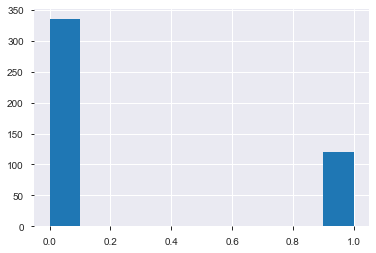

In [240]:
data['Y_class'].hist()
data['Y_class'].value_counts()
y=data['Y_class']
## --> balanced?

In [241]:
print(len(XCol))
print(YCol)

57
PW010


In [242]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train.shape


(364, 7)

#### a) Logistic Regression

In [243]:
lr = LogisticRegression()
lr.fit(X_train,y_train)

y_pred=lr.predict(X_test)

C:\Users\haenni\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [244]:
acc = lr.score(X_test,y_test)
acc

0.7142857142857143

In [245]:
conf=confusion_matrix(y_test, y_pred)

print( "accuracy: "  + str(round((conf[1,1]+conf[0,0])/ conf.sum()*100,2)))
print( "precision: " +str(round((conf[0,0])/ (conf[1,0]+conf[0,0])*100,2)))

conf

#tn,fp,fn,tp = confusion_matrix(y_test, y_pred).flatten()
### it predicts all as 1...

accuracy: 71.43
precision: 71.43


array([[65,  0],
       [26,  0]], dtype=int64)

#### b) DecisionTree Classify

In [246]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)

In [247]:
acc = dtc.score(X_test, y_test)*100
print(f"Decision Tree Test Accuracy {round(acc, 2)}%")

Decision Tree Test Accuracy 53.85%


In [248]:
conf=confusion_matrix(y_test, y_pred)

print( "accuracy: "  + str(round((conf[1,1]+conf[0,0])/ conf.sum()*100,2)))
print( "precision: " +str(round((conf[0,0])/ (conf[1,0]+conf[0,0])*100,2)))

conf

accuracy: 53.85
precision: 69.49


array([[41, 24],
       [18,  8]], dtype=int64)

#### c) Support Vector Maschine

In [249]:
svm = SVC()
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)

C:\Users\haenni\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [250]:
acc = svm.score(X_test,y_test)*100
print(f"SVM Algorithm Test Accuracy {round(acc, 2)}%")

SVM Algorithm Test Accuracy 71.43%


In [251]:
conf=confusion_matrix(y_test, y_pred)

print( "accuracy: "  + str(round((conf[1,1]+conf[0,0])/ conf.sum()*100,2)))
print( "precision: " +str(round((conf[0,0])/ (conf[1,0]+conf[0,0])*100,2)))
conf

accuracy: 71.43
precision: 71.43


array([[65,  0],
       [26,  0]], dtype=int64)

#### d) K-Nearest Neighbour

In [252]:
knn = KNeighborsClassifier(n_neighbors = 2)  # n_neighbors means k
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [253]:
acc = knn.score(X_test, y_test)*100
acc

72.52747252747253

In [254]:
conf=confusion_matrix(y_test, y_pred)

print( "accuracy: "  + str(round((conf[1,1]+conf[0,0])/ conf.sum()*100,2)))
print( "precision: " +str(round((conf[0,0])/ (conf[1,0]+conf[0,0])*100,2)))
conf

accuracy: 72.53
precision: 74.39


array([[61,  4],
       [21,  5]], dtype=int64)

In [255]:
### conclusion

Process	(backup)

•	Simbalance checking (undersampling, oversamplingML umbalanced data lib)

•	Split --> X_tr, y_tr, / X_ts,  y_ts

•	Try few models (with different algorithms) (<-- pipeline)

    –	Initialization

    –	Fit / predict

    –	Evaluation (overfitting / underfitting)

•	Choose best option based on requirements

•	Optimize the model

    –	Cross -validation

    –	Try few models (with same way to approach problem)

        o	Init

        o	Fit.(predict)

        o	Evaluation

    –	Hpyertuning
